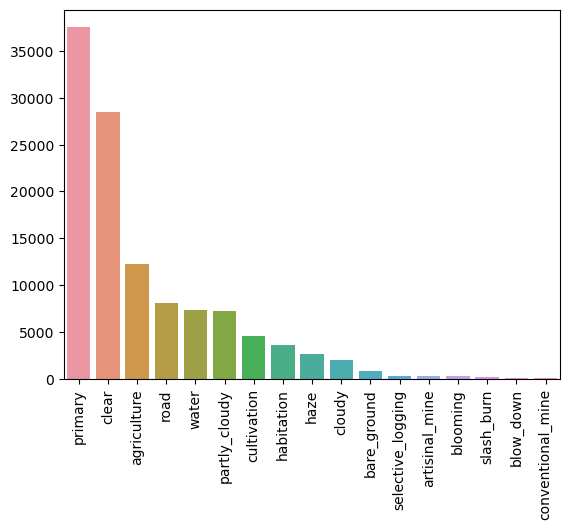

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('planet/planet/train_v2.csv/train_v2.csv')

df['tags'] = df['tags'].apply(lambda x: x.split(' '))
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=90)
plt.show()

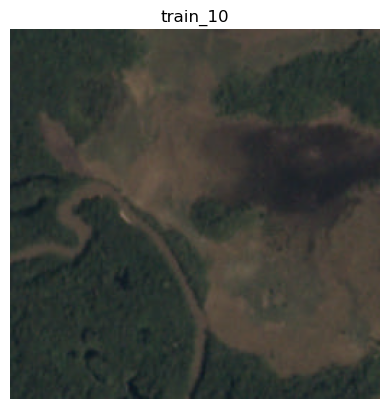

In [31]:
import cv2
import os

def get_image(name, folder='planet/planet/train-jpg', ext='jpg'):
    img_path = f'{folder}/{name}.{ext}'
    if not os.path.exists(img_path):
        print(f"Image {img_path} does not exist.")
        return None
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image {img_path}.")
    return img

def show_image(img, title=''):
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"Cannot display image {title} as it is None.")

example_image_name = 'train_10'
example_image = get_image(example_image_name)
show_image(example_image, title=example_image_name)

100%|██████████| 1000/1000 [00:01<00:00, 771.40it/s]


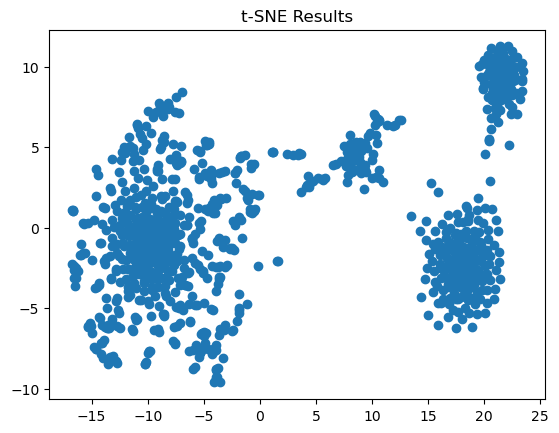

In [32]:
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE

def normalize_images(image_names):
    images = []
    for name in tqdm(image_names):
        img = get_image(name)
        if img is not None:
            img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX).reshape(-1)
            images.append(img)
    if images:
        return np.vstack(images)
    else:
        print("No images were loaded for normalization.")
        return np.array([])

sample_images = df.sample(1000, random_state=42)['image_name']
img_matrix = normalize_images(sample_images)
if img_matrix.size > 0:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(img_matrix)

    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.title('t-SNE Results')
    plt.show()
else:
    print("No valid images to perform t-SNE.")

In [33]:
from sklearn.cluster import KMeans
import numpy as np

def segment_image(image_name, n_clusters=3):
    img = get_image(image_name)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = img_rgb.reshape(-1, 3)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
        segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)
        labels = kmeans.labels_
        return segmented_img, labels, img.shape
    else:
        return None, None, None

def calculate_cluster_percentages(labels, img_shape, n_clusters=3):
    total_pixels = img_shape[0] * img_shape[1]
    cluster_percentages = [(labels == i).sum() / total_pixels * 100 for i in range(n_clusters)]
    return cluster_percentages

def analyze_image(image_name):
    df = pd.read_csv('planet/planet/train_v2.csv/train_v2.csv')

    labels = df[df['image_name'] == image_name]['tags'].values[0].split(' ')

    n_clusters=len(labels)-1

    segmented_img, labels, img_shape = segment_image(image_name, n_clusters)
    if segmented_img is not None:
        plt.figure(figsize=(10, 5))



        plt.subplot(1, 2, 1)
        original_img = get_image(image_name)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image: {image_name}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_img.astype('uint8'))
        plt.title(f'Segmented Image: {image_name}')
        plt.axis('off')

        print("Porcentagem de clusters:")

        cluster_percentages = calculate_cluster_percentages(labels, img_shape, n_clusters)
        for i, percentage in enumerate(cluster_percentages):
            print(f"Cluster {i}: {percentage:.2f}%")

        plt.show()
    else:
        print(f"Failed to analyze image {image_name}.")




Porcentagem de clusters:
Cluster 0: 100.00%


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


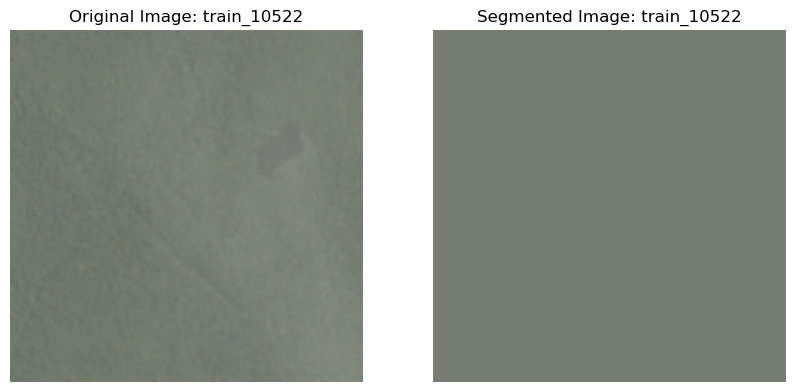

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 54.67%
Cluster 1: 45.33%


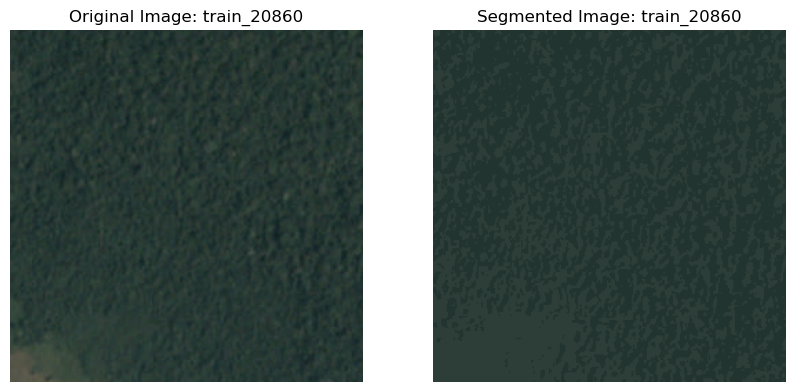

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 67.50%
Cluster 1: 8.49%
Cluster 2: 24.01%


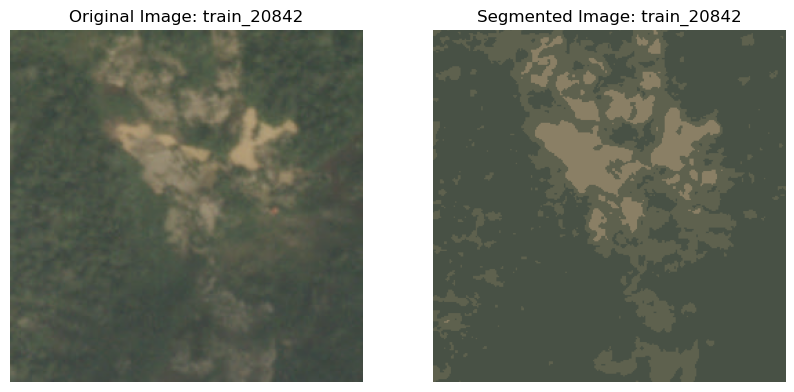

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 100.00%


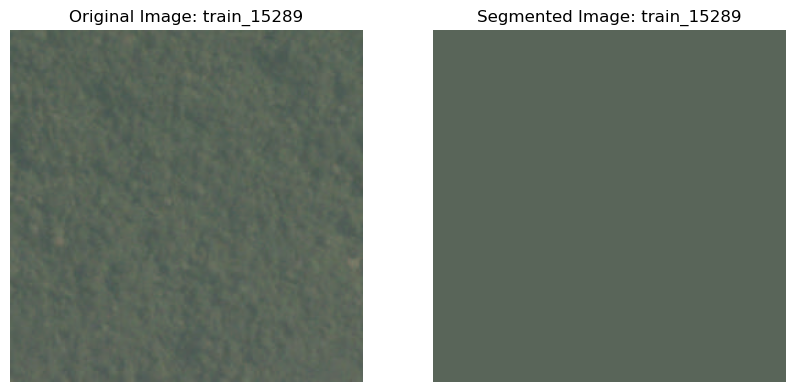

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 9.31%
Cluster 1: 50.22%
Cluster 2: 36.09%
Cluster 3: 4.37%


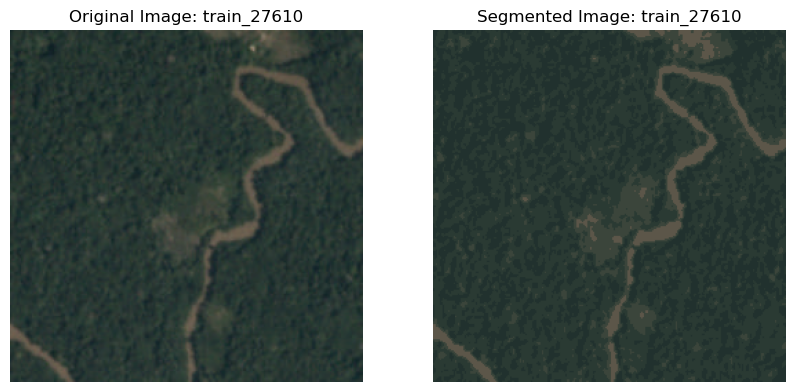

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 93.96%
Cluster 1: 6.04%


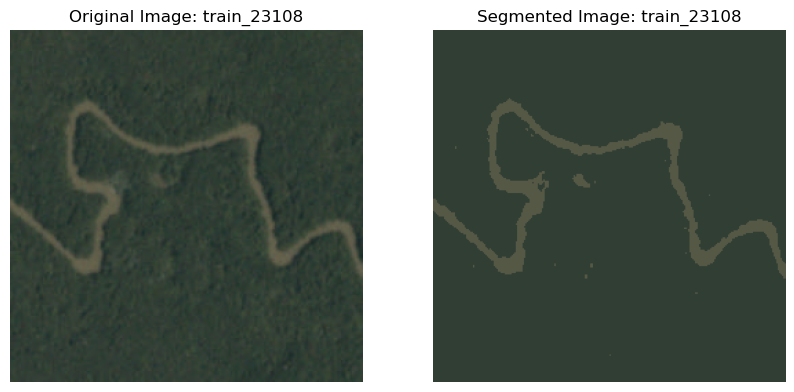

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 59.81%
Cluster 1: 40.19%


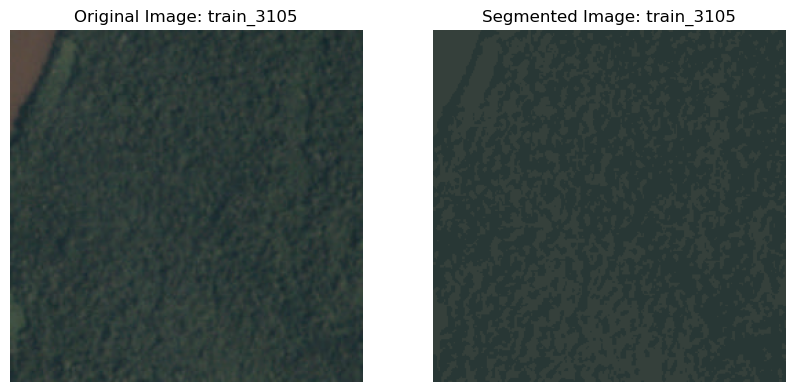

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 100.00%


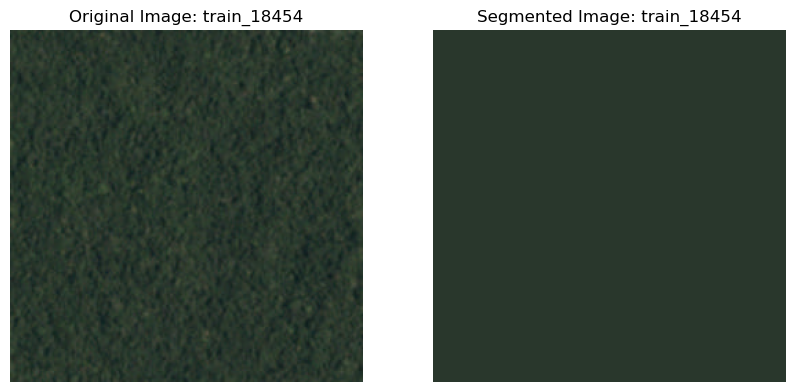

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 77.49%
Cluster 1: 22.51%


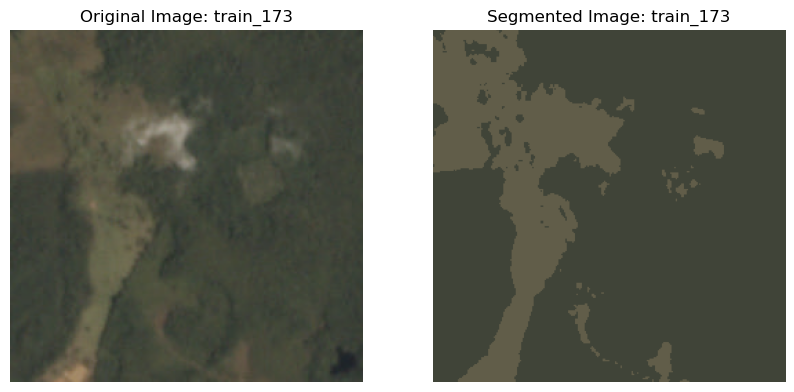

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 32.78%
Cluster 1: 33.79%
Cluster 2: 33.43%


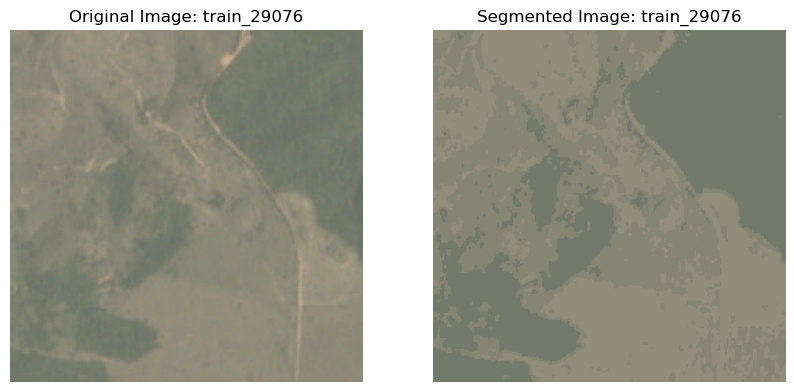

In [43]:
import random

for i in range(10):
    analyze_image(f'train_{random.randint(0, 40000)}')